## Shreya Mitra
### The Sparks Foundation (data science and business analytics internship)
Task one (beginner level)- Prediction using supervised ML


The objective of this study is to determine the percentage that a student would get, given the numbers of hours he studies.
The given dataset has only two variables, so the method to be followed is **linear regression**. 

In [1]:
#First we need to import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#Now we need to import the required dataset from external sources
data = pd.read_csv("http://bit.ly/w-data")
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [14]:
#getting to know the statistical features of the dataset
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


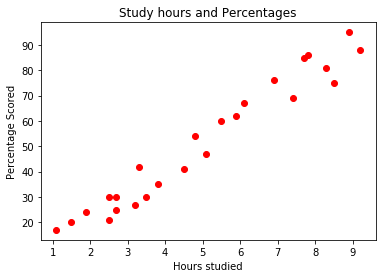

In [9]:
# Plotting of the data to get an idea of the relationship between the two variables
plt.scatter( x= data['Hours'] , y = data['Scores'] , color = 'red')
plt.title('Study hours and Percentages')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Scored')
plt.show()
#frm the graph below we see a clear linear relationship

In [24]:
# we have to separate the dependent and the independent variable for regression
X = data['Hours'].values.reshape(-1,1)
Y = data['Scores'].values.reshape(-1,1)

In [25]:
#we have to split the data into training and testing parts
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

In [26]:
#training the algorithm
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

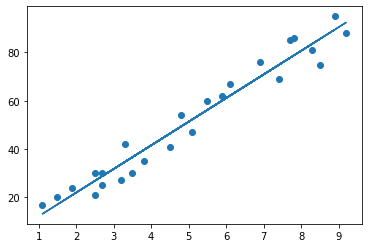

In [29]:
#Plotting the regression line
line = regressor.coef_*X+regressor.intercept_
#Plotting the data
plt.scatter(X,Y)
plt.plot(X,line)
plt.show()

In [34]:
#looking at the regression coefficient
print(regressor.coef_)

[[9.78856669]]


In [32]:
#making the predictions
X_test
y_pred = regressor.predict(X_test)

In [36]:
#compare the actual values and the predicted values
df = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': y_pred.flatten()})  
df

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


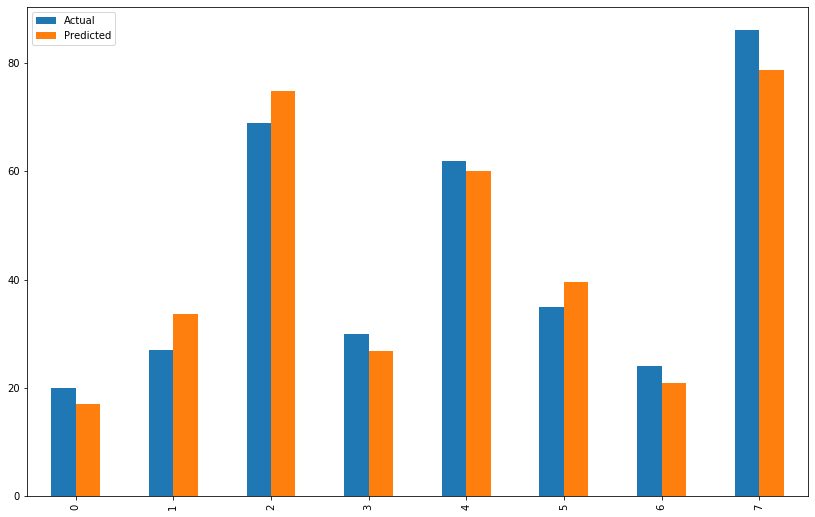

In [37]:
#we can visulaize the result too
df.plot(kind='bar', figsize= (14,9))

In [49]:
#Evaluating the model
from sklearn import metrics
#we find the mean absolute error
mse = (metrics.mean_absolute_error(Y_test, y_pred))
print("Mean Absolut Error:", mse)
       

Mean Absolut Error: 4.419727808027652


In [51]:
#We look at the r square
r_2 = metrics.r2_score(Y_test, y_pred)
print("R Squared value:",r_2)

R Squared value: 0.9568211104435257


In [47]:
#how much will be the score when a student studies 9.25 hours?
hours= np.array([9.25])
hours = hours.reshape(-1,1)

own_prediction = regressor.predict(hours)
print("No. of hours= {}".format(hours))
print("The percentage score will be = {}".format(own_prediction[0]))

No. of hours= [[9.25]]
The percentage score will be = [92.91505723]


## Thank you